# Gyroscope DDPG reward function testing (spinup library)

In [1]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
from os import path
from scipy.integrate import solve_ivp
import pandas as pd

import gym_gyroscope_env
import spinup
import torch
from functools import partial

from custom_functions.custom_functions import env_fn 
from custom_functions.custom_functions import create_env
from custom_functions.custom_functions import load_agent
from custom_functions.custom_functions import test_agent
from custom_functions.custom_functions import plot_test
from custom_functions.custom_functions import evaluate_control
from custom_functions.custom_functions import read_progress

import random
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

## Plot rewards

iter2_base 2000
iter2_reward01 2000
iter2_reward02 2000
iter2_reward03 2000
iter2_reward04 2000


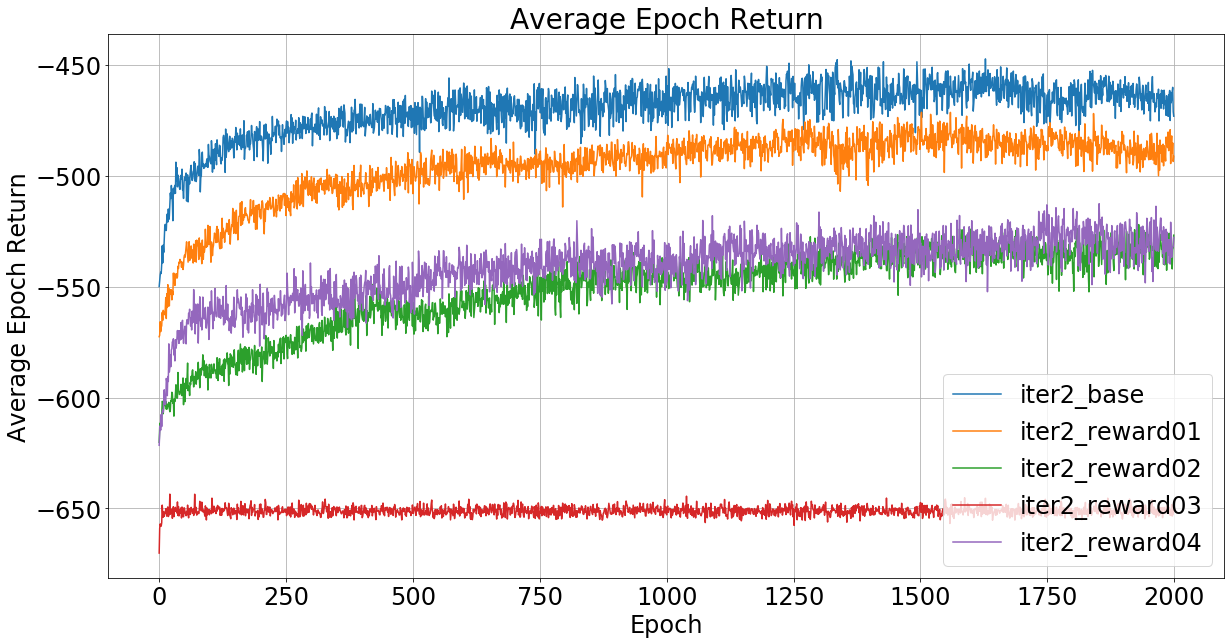

In [96]:
plt.figure(figsize=(20,10))
plt.title('Average Epoch Return',fontsize=28)
plt.xlabel('Epoch',fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('Average Epoch Return',fontsize=24)
plt.yticks(fontsize=24)
plt.grid()

agent_paths = ['iter2_base','iter2_reward01','iter2_reward02','iter2_reward03','iter2_reward04',
              'iter2_polyak01','iter2_polyak02','iter2_lr01','iter2_lr02','iter2_noise01','iter2_noise02']
# agent_paths = ['iter2_final']

for agent_path in agent_paths[:5]:
    progress = read_progress(agent_path)
    print(agent_path, len(progress))
    plt.plot(np.arange(progress.shape[0]), progress[:,1])
#     plt.fill_between(np.arange(progress.shape[0]), progress[:,3], progress[:,4], alpha=0.5)
#     plt.fill_between(np.arange(progress.shape[0]), progress[:,1]+progress[:,2], progress[:,1]-progress[:,2], alpha=0.5)

# plt.xlim([0,500])
# plt.ylim([-2000,0])
plt.legend(agent_paths,fontsize=24)

## Test an agent

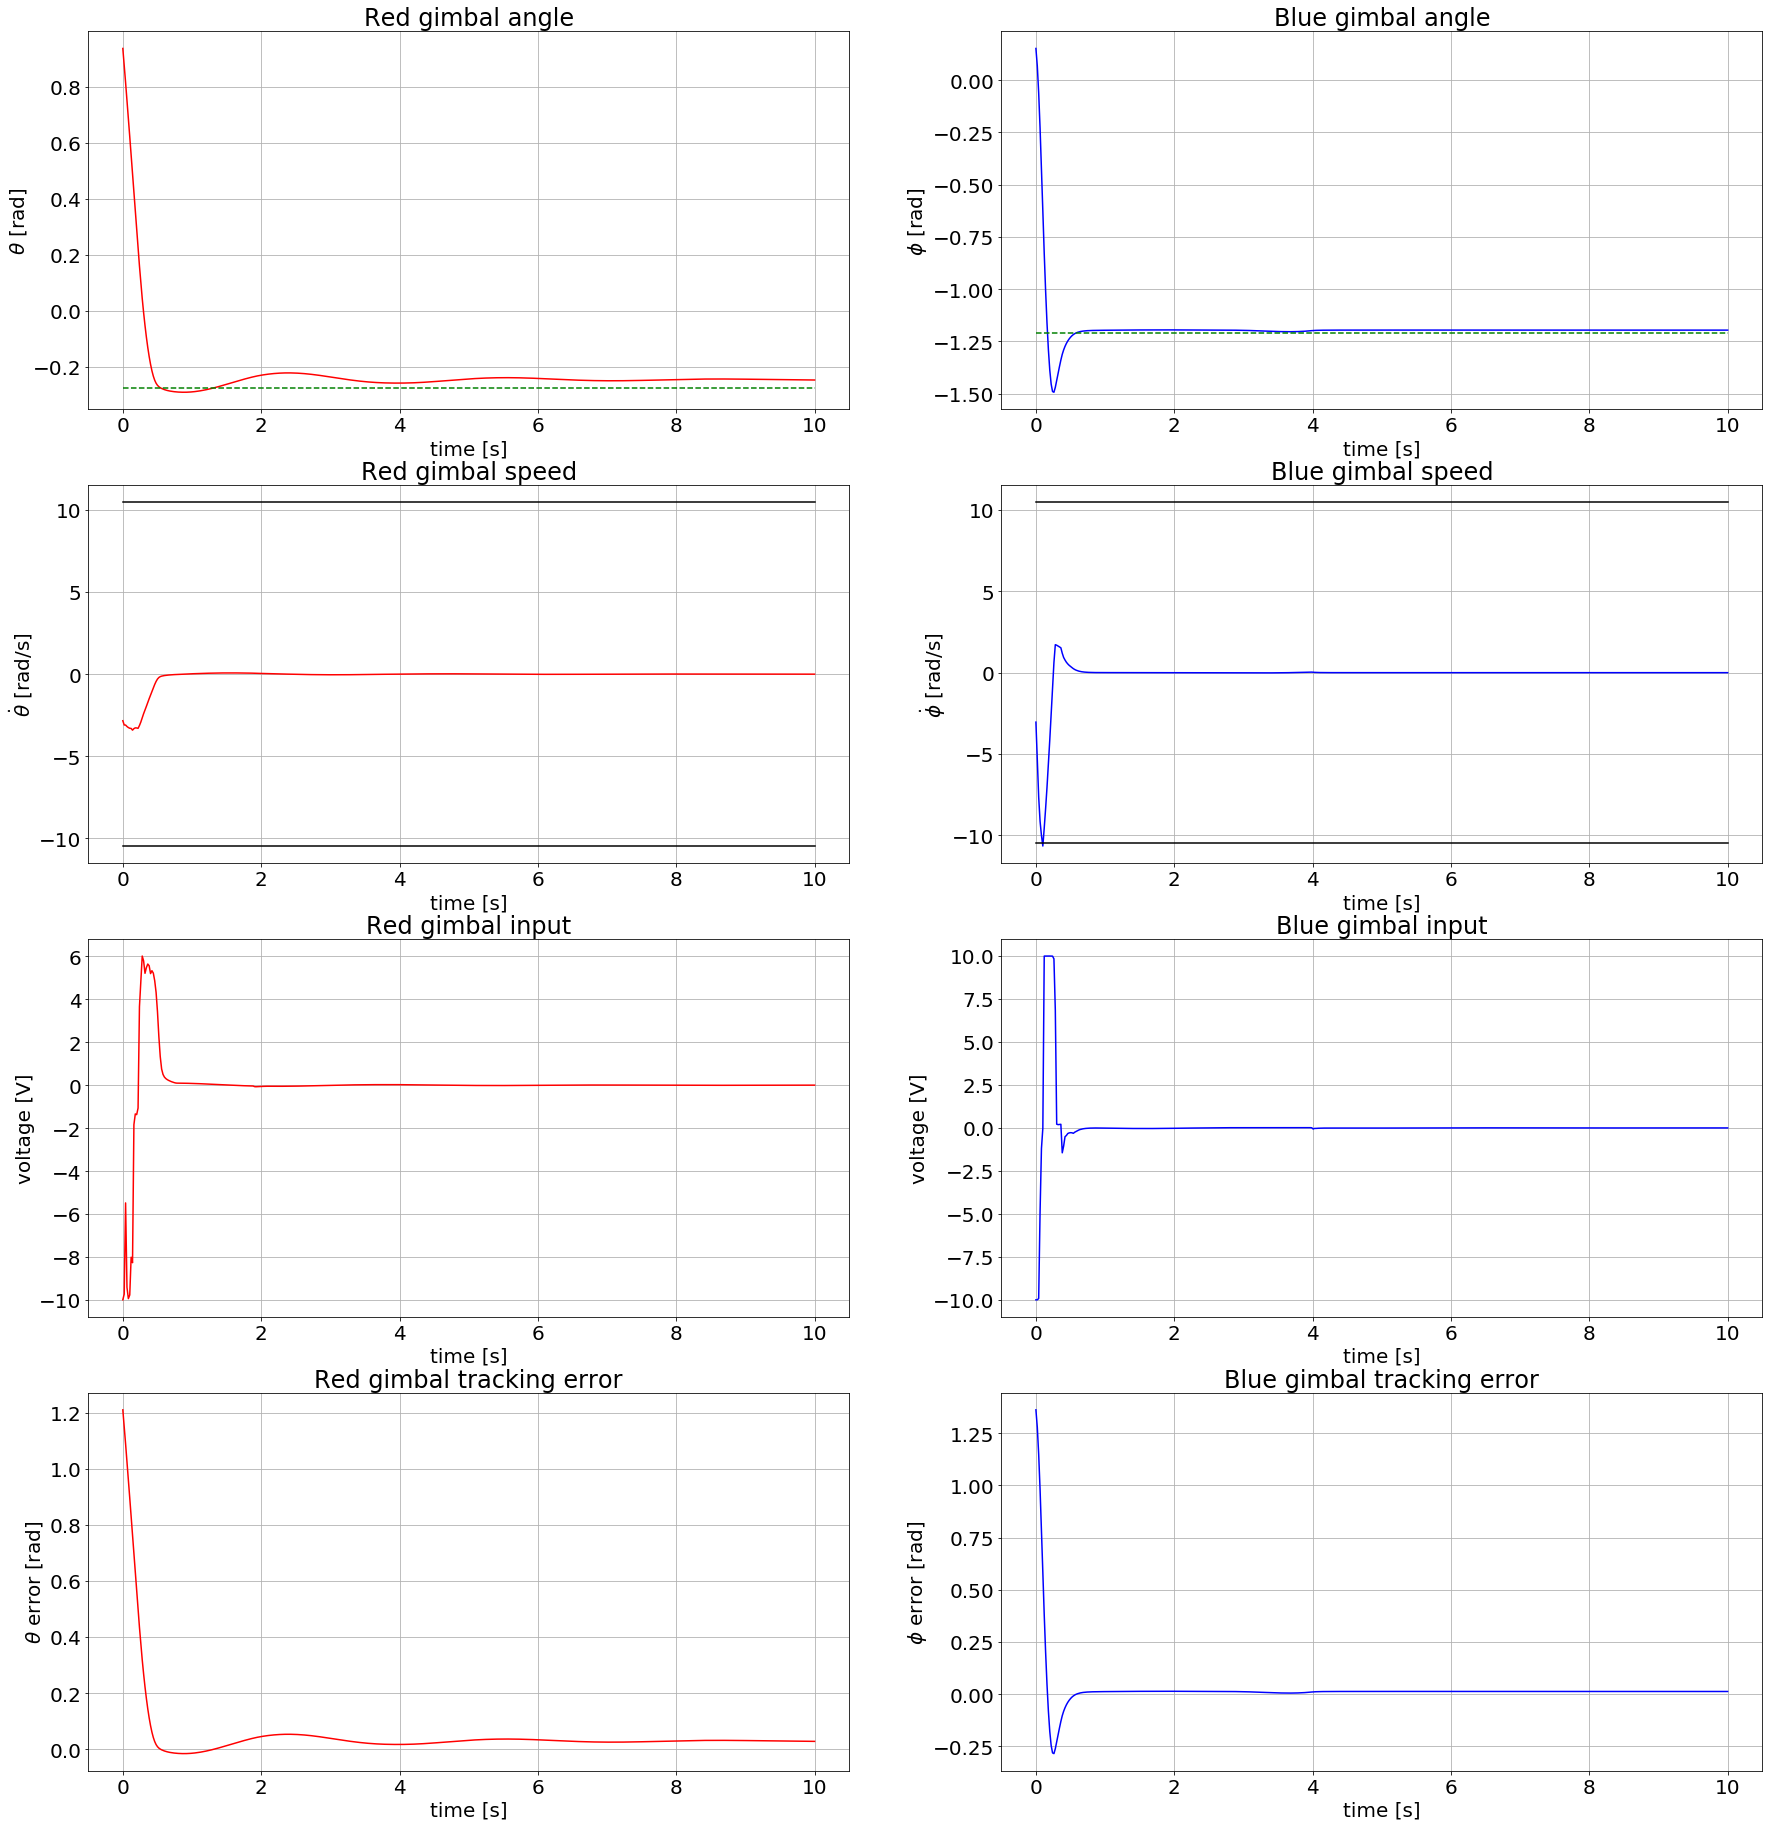

In [100]:
# Test paramaters
env_name = 'GyroscopeEnv-v1'
simu_args = {
    'dt': 0.02,
    'ep_len': 250,
    'seed': 2
}
reward_func = 'Power'
reward_args = {
    'qx1': 1, 
    'qx2': 0, 
    'qx3': 1, 
    'qx4': 0, 
    'pu1': 0, 
    'pu2': 0,
    'p': 0.05
}
init_state = np.array([0,0,0,0,90/180*np.pi,0,200/60*2*np.pi])
init_state = np.array([0,0,0,0,0,60/180*np.pi,200/60*2*np.pi])
init_state = None

env = create_env(env_name,simu_args,reward_func,reward_args,state=init_state)

agent_paths = ['iter2_base','iter2_reward01','iter2_reward02','iter2_reward03','iter2_reward04']
# agent_paths = ['iter2_final']

agent = load_agent(agent_paths[1])
t_end = 10

score, state_record, obs_record, action_record, reward_record = test_agent(env,agent,t_end)
plot_test(state_record, action_record, t_end, 4)

## Evaluate control performance

In [5]:
# iter2_metrics = pd.read_csv('iter2_metrics.csv')
# pd.set_option('display.max_columns', None)
# iter2_metrics

In [6]:
# iter2_final_metrics = pd.read_csv('iter2_final_metrics.csv')
# pd.set_option('display.max_columns', None)
# iter2_final_metrics

In [7]:
# metrics = pd.read_csv(agent_paths[0]+'_metrics.csv')
# for ap in agent_paths[1:]:
#     m = pd.read_csv(ap+'_metrics.csv')
#     metrics = pd.concat([metrics, m.iloc[:,1:]], axis=1)
# metrics = metrics.round(4)
# metrics.to_csv('iter2_metrics.csv',index=False)
# metrics